In [126]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import gridspec

In [191]:
raw_asset_prices = pd.read_csv("asset_prices.csv")
raw_filled_orders = pd.read_csv("filled_orders.csv")

interval = "30S"

In [200]:
def condense_assset_df(ddf, agg_interval):
    agg_col_definition = {
        "open": "first",
        "high": "max",
        "low": "min",
        "close": "last",
        "volume": "sum",
        "number_of_trades": "sum",
        "bid_volume": "sum",
        "ask_volume": "sum",
    }    
    return ddf.resample(agg_interval).agg(agg_col_definition)
    

def prepare_asset_data(ddf, agg_interval):    
    ddf.ts = pd.to_datetime(ddf.ts)
    ddf.set_index("ts", inplace=True)
    ddf = condense_assset_df(ddf, interval)
    return ddf


def prepare_filled_orders_data(ddf):
    cols = ["buy_or_sell", "order_type", "price", "quantity", "oco_id", "executed_at"]
    ddf = ddf[cols].copy()
    ddf.executed_at = pd.to_datetime(ddf.executed_at)
    return ddf

def get_opening_range(ddf):
    opening_range = ddf.between_time(
        "12:30:00", "12:30:30"
    )  # TODO, make this work with/without DST
    high, low = opening_range.close.max(), opening_range.close.min()
    return (high, low)

def get_opening_range_last_ts(ddf):
    return ddf.between_time("12:30:00", "12:30:30").index.values[-1]

def only_rth_data(ddf):
    return ddf.between_time("12:30:00", "20:00:00")

def dot_annotation_for_order(order_row):
    if order_row.buy_or_sell == "buy":
        return "go"
    if order_row.buy_or_sell == "sell":
        return "ro"

In [193]:
asset_prices = prepare_asset_data(raw_asset_prices, interval)
filled_orders = prepare_filled_orders_data(raw_filled_orders)

In [201]:
def plot_filled_orders(ddf, ddf_filled_orders):
    plt.figure(figsize=(15,8))
    plt.grid(True)

    title = f"date = {k}"
    plt.title(title)
    
    or_high, or_low = get_opening_range(ddf)
    
    plt.plot(only_rth_data(ddf).close)
    
    plt.axhline(y=or_high, color='r', lw=0.8)
    plt.axhline(y=or_low, color='r', lw=0.8)
    plt.axhline(y=((or_high + or_low))/2, color='b', lw=0.3)
    
    plt.axhline(y=3383, color='b', lw=0.3)
    
    x = get_opening_range_last_ts(ddf)
    plt.axvline(x=x, color='r', lw=0.6)
    
    for i, order_row in ddf_filled_orders.iterrows():
        annotation = dot_annotation_for_order(order_row)
        plt.plot(order_row.executed_at, order_row.price, annotation)

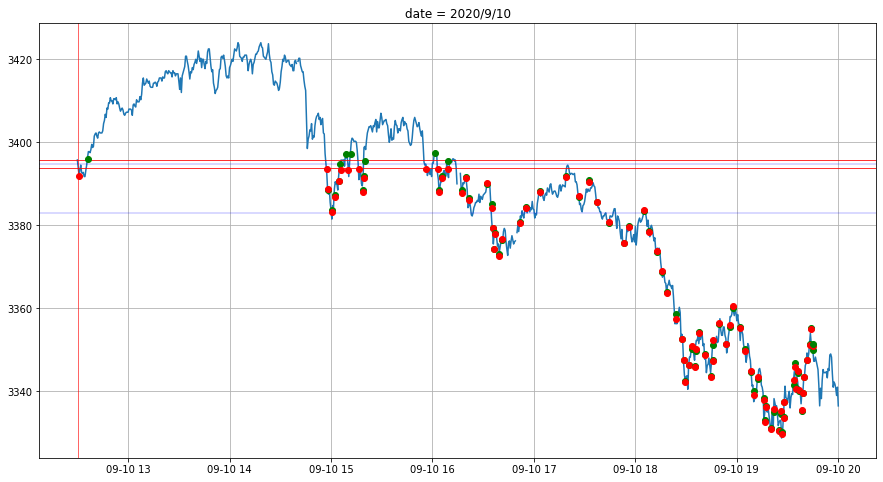

In [202]:
for date, asset_prices_by_date in asset_prices.groupby(asset_prices.index.date):
    plot_filled_orders(asset_prices_by_date, filled_orders)

In [197]:
filled_orders

,buy_or_sell,order_type,price,quantity,oco_id,executed_at
0,sell,MARKET,3392.00,1,NaN,2020-09-10 12:31:00+00:00
1,buy,STOP,3396.00,1,f9873868-e5b3-4c67-8319-f114bcfa57ce,2020-09-10 12:36:00+00:00
2,sell,MARKET,3393.50,1,NaN,2020-09-10 14:57:39+00:00
3,buy,LIMIT,3388.50,1,a8639f00-2491-46f6-9950-e69419625061,2020-09-10 14:58:10+00:00
4,sell,MARKET,3388.75,1,NaN,2020-09-10 14:58:11+00:00
...,...,...,...,...,...,...
165,buy,STOP,3355.25,1,fe3c6440-da12-4196-93c8-501d458f5910,2020-09-10 19:43:53+00:00
166,sell,MARKET,3355.00,1,NaN,2020-09-10 19:43:54+00:00
167,buy,LIMIT,3350.00,1,198c3f8c-c2e3-43b5-bac6-f85fa9ad83cc,2020-09-10 19:44:58+00:00
168,sell,MARKET,3351.00,1,NaN,2020-09-10 19:44:59+00:00
